# IMPORT LIBRARY

In [67]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

# for model
from sklearn.neural_network import MLPClassifier

# for accuracy
from sklearn.model_selection import cross_val_score

# for data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder    # for encoding

# LOAD THE DATA 

In [68]:
data = pd.read_csv("apple_quality.csv")
data

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   
4000     NaN       NaN       NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
0                          -0.491590483    good  
1                          -0.722809367    good  
2                           2.621636473     bad  
3                           0.790723217    good  
4                           0.501984036    good  
...                                 ...     ...  
3996                        1.854235285    good  
3997                       -1.334611391     bad  
3998                       -2.229719806    good  
3999                        1.599796456    good  
4000  Created_by_Nidula_Elgiriyewithana     NaN  

[4001 rows x 9 columns]

### checking data information

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [70]:
data.describe()

A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.874427  
min      -5.961897    -5.864599  
25%      -0.801286    -0.771677  
50%       0.534219     0.503445  
75%       1.835976     1.766212  
max       7.364403     7.237837

### checking categorical labels

In [71]:
data["Quality"].value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

# DATA CLEANING
### droping A_id

In [72]:
data.drop(columns = ["A_id"], inplace=True)
#data = data.drop('A_Id', axis=1)
data

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0    -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1    -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2    -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3    -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...        ...       ...        ...          ...        ...       ...   
3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   
4000       NaN       NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
0                          -0.491590483    good  
1                          -0.722809367    good  
2                           2.621636473     bad  
3                           0.790723217    good  
4                           0.501984036    good  
...                                 ...     ...  
3996                        1.854235285    good  
3997                       -1.334611391     bad  
3998                       -2.229719806    good  
3999                        1.599796456    good  
4000  Created_by_Nidula_Elgiriyewithana     NaN  

[4001 rows x 8 columns]

### dropping the last row

In [73]:
data.dropna(inplace=True)

data

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0    -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1    -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2    -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3    -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...        ...       ...        ...          ...        ...       ...   
3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

           Acidity Quality  
0     -0.491590483    good  
1     -0.722809367    good  
2      2.621636473     bad  
3      0.790723217    good  
4      0.501984036    good  
...            ...     ...  
3995   0.137784369     bad  
3996   1.854235285    good  
3997  -1.334611391     bad  
3998  -2.229719806    good  
3999   1.599796456    good  

[4000 rows x 8 columns]

### label encoding

In [74]:
"""
good => 1
bad  => 0
"""

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["Quality"] = encoder.fit_transform(data["Quality"])

In [75]:
encoder.classes_

array(['bad', 'good'], dtype=object)

In [76]:
data

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0    -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1    -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2    -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3    -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...        ...       ...        ...          ...        ...       ...   
3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

           Acidity  Quality  
0     -0.491590483        1  
1     -0.722809367        1  
2      2.621636473        0  
3      0.790723217        1  
4      0.501984036        1  
...            ...      ...  
3995   0.137784369        0  
3996   1.854235285        1  
3997  -1.334611391        0  
3998  -2.229719806        1  
3999   1.599796456        1  

[4000 rows x 8 columns]

### changing Acidity datatype

In [77]:
data = data.astype({'Acidity': 'float64'})

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 265.6 KB


# DATA VISUALISATION

In [79]:
tmp = data
tmp.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

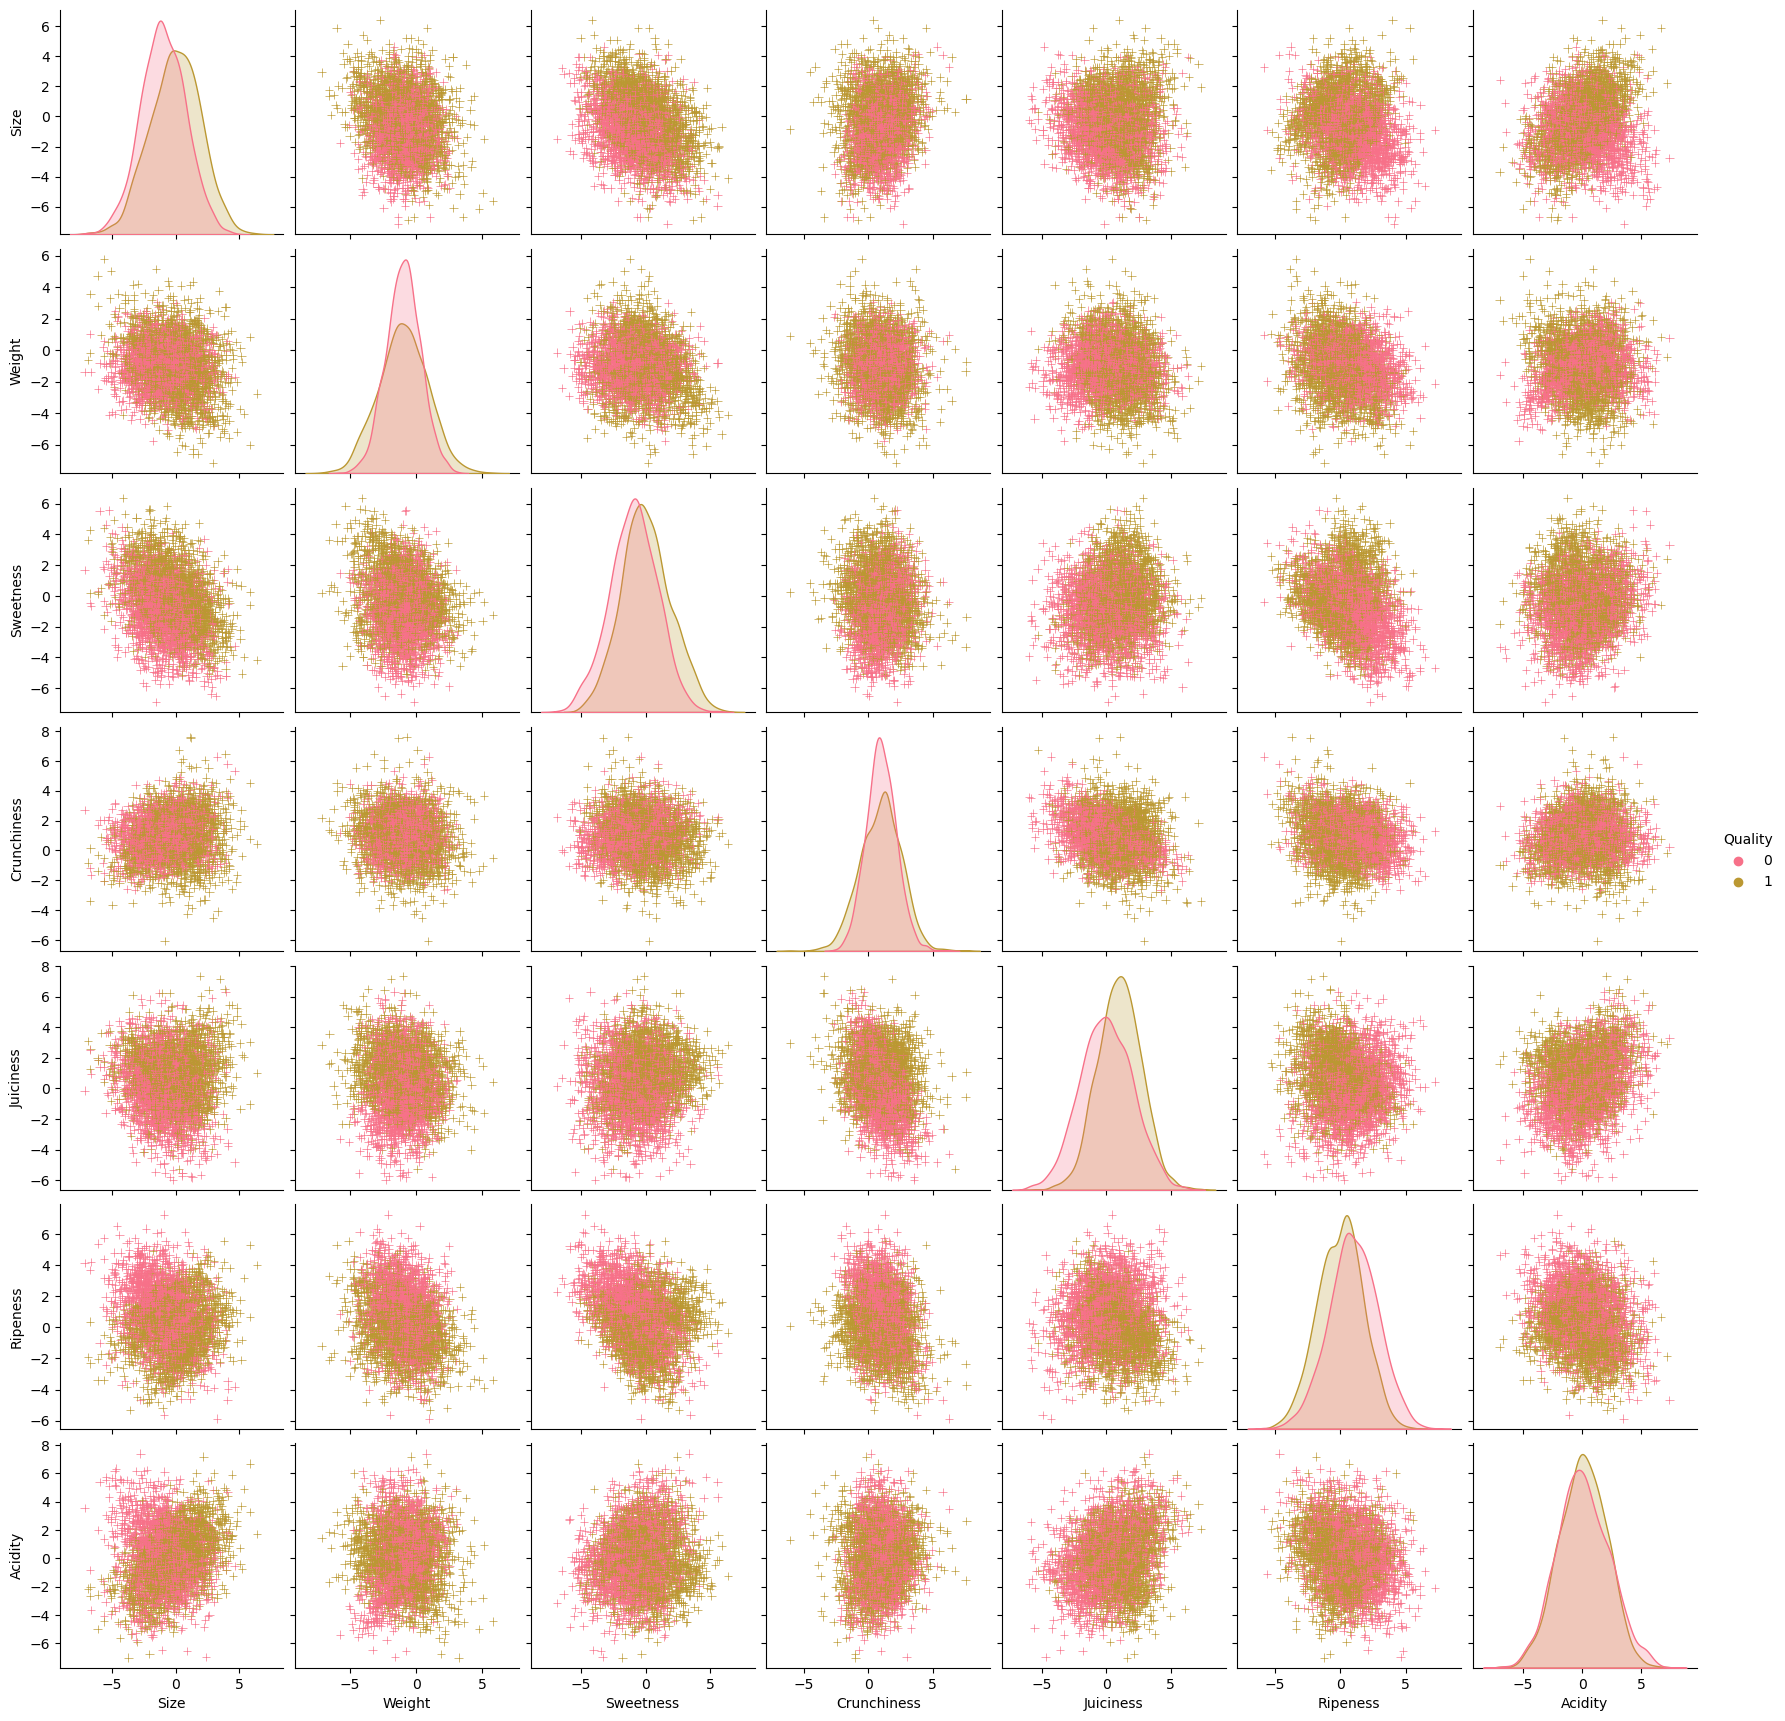

In [80]:
tmp = data
g = sns.pairplot(tmp, hue='Quality', markers='+')
plt.show()

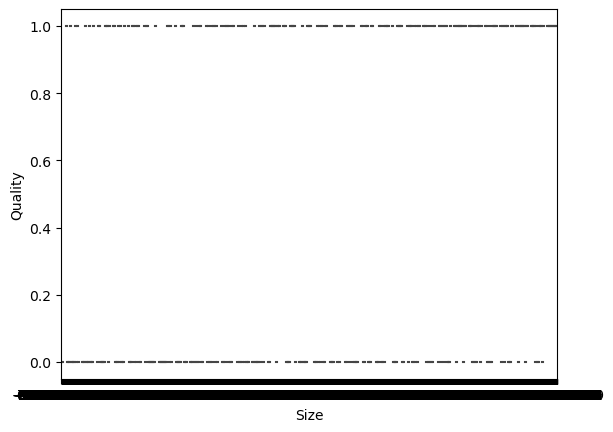

In [81]:
g = sns.violinplot(y='Quality', x='Size', data=data, inner='quartile')
plt.show()

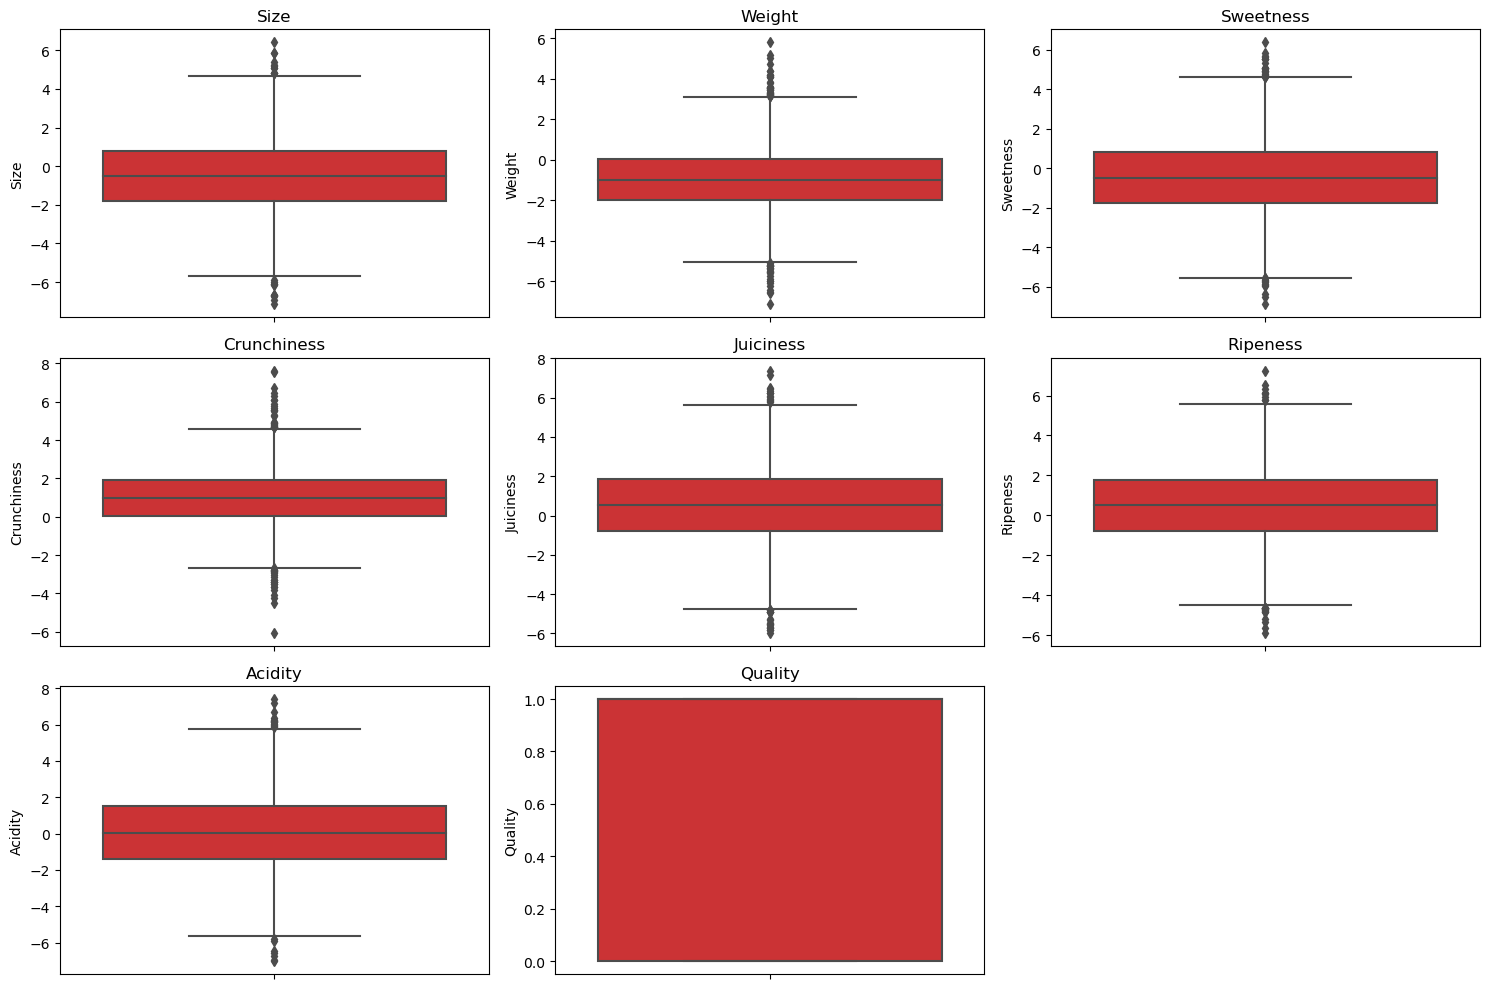

In [82]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity','Quality']

plt.figure(figsize=(15, 10))
sns.set_palette("Set1")

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

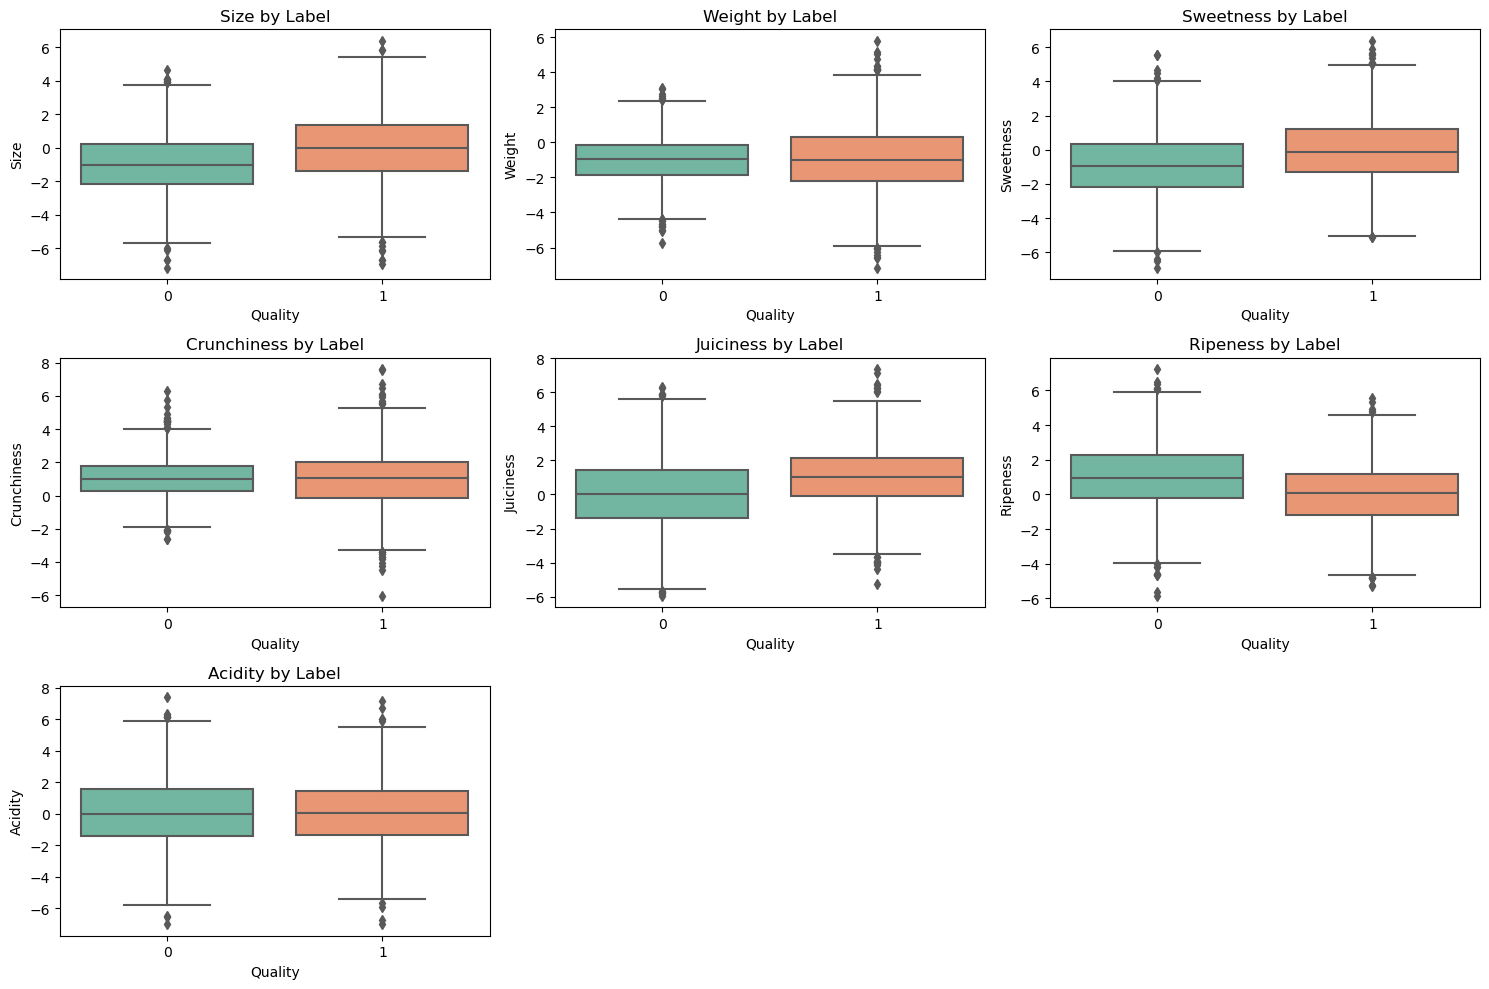

In [83]:
plt.figure(figsize=(15, 10))
sns.set_palette("Set2")

for i, column in enumerate(data.columns[:-1]):  
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Quality', y=column, data=data)
    plt.title(f'{column} by Label')

plt.tight_layout()
plt.show()

# DATA PREPROCESSING
### splitting target and feature

In [84]:
X = data.drop('Quality', axis=1)
y = data["Quality"]

In [85]:
print(X.shape,"\n")
print(type(X),"\n")
print(X.head())

(4000, 7) 

<class 'pandas.core.frame.DataFrame'> 

       Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984


In [86]:
print(y.shape,"\n")
print(type(y),"\n")
print(y.head())

(4000,) 

<class 'pandas.core.series.Series'> 

0    1
1    1
2    0
3    1
4    1
Name: Quality, dtype: int32


### splitting training and testing data

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3200, 7)
(3200,)
(800, 7)
(800,)


# MODELLING
### MLPClassifier

In [88]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=[80,40,20], max_iter=200, random_state=42,
                        learning_rate_init=0.003 )
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)

In [89]:
from sklearn.model_selection import cross_val_score

cross_val_score(mlp_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.92314902, 0.90721649, 0.92026266])

In [91]:
# confusion matrix and accuracy

print(f"Classification report for classifier {mlp_clf}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

print(f"\nAccuracy = {mlp_clf.score(X_test, y_test)*100}%")

Classification report for classifier MLPClassifier(hidden_layer_sizes=[80, 40, 20], learning_rate_init=0.003,
              random_state=42):
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       412
           1       0.90      0.97      0.94       388

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800



Accuracy = 93.625%
